In [35]:
# Reference: https://plantcv.readthedocs.io/en/stable/vis_tutorial/
# Import required packages

import cv2
import numpy as np
import matplotlib.pyplot as plt
from plantcv import plantcv as pcv
pcv.params.debug = "plot"
%matplotlib inline

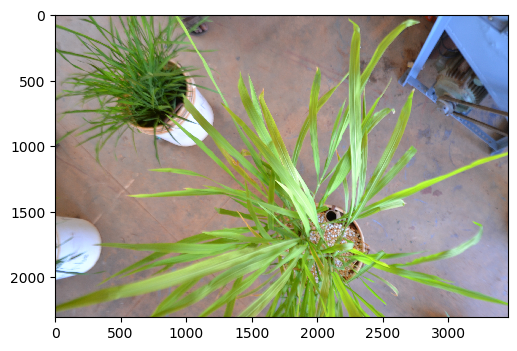

In [50]:
# Load image

#FILENAME="/media/shadowsaint/New Volume/1. RVCE/7th Sem/5. CV/Images/DSC_0004.JPG"
FILENAME="E:\RVCE\VII SEM\Computer Vision\Images\DSC_0011.JPG"

img, path, filename = pcv.readimage(filename=FILENAME, mode='rgb')

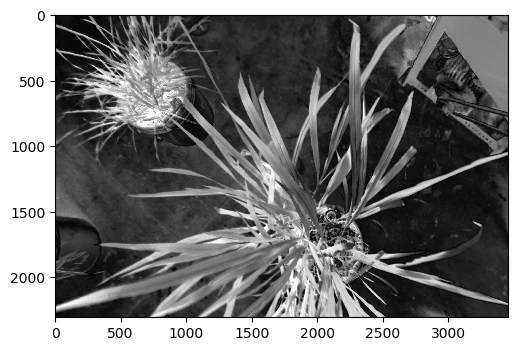

In [51]:
# RGB to HSV (Hue, Saturation, Value)

s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

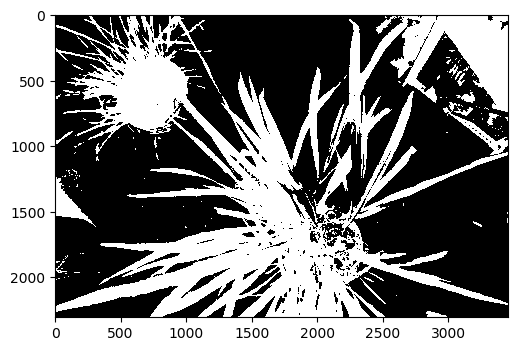

In [52]:
# Binary thresholding (to extract saturated parts)

s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

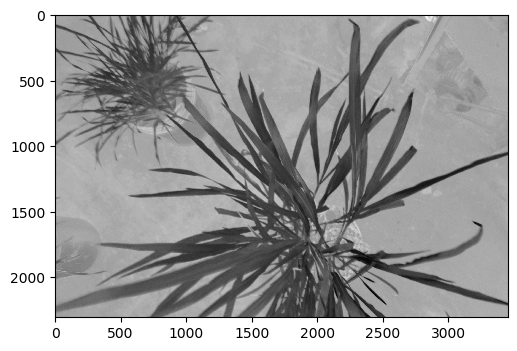

In [53]:
# RGB to LAB (Lightness, Red/Green, Blue/Yellow)

b = pcv.rgb2gray_lab(rgb_img=img, channel='a')
b_smooth = cv2.blur(b, (15,15))
# b_median = pcv.gaussian_blur(img=b, ksize=(15,15),sigma_x=3,sigma_y=3)

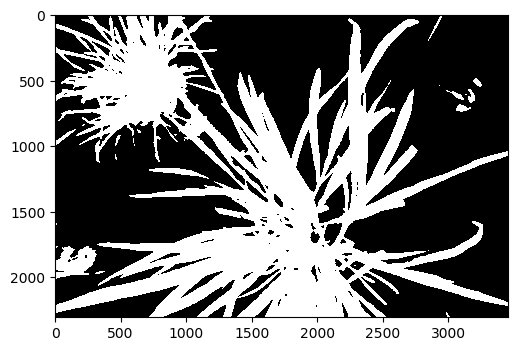

In [54]:
# Binary threshold (to extract blue/yellow parts)

b_thresh = pcv.threshold.binary(gray_img=b_smooth, threshold=125, max_value=255, object_type='dark')

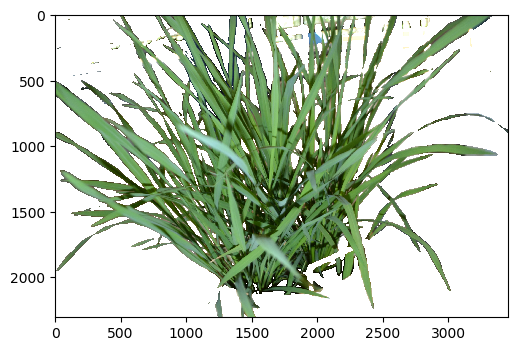

In [42]:
# Join the binary images using logical OR

masked = pcv.apply_mask(rgb_img=img, mask=b_thresh, mask_color='white')

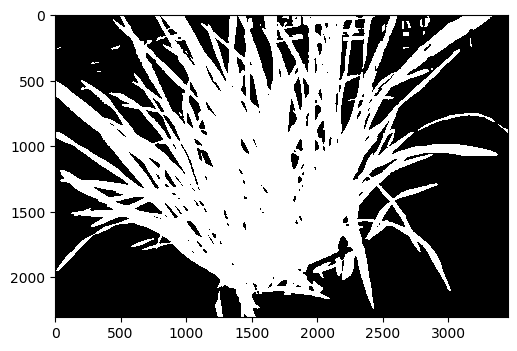

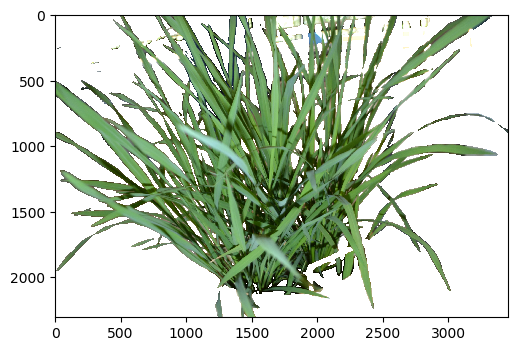

In [43]:
ab_fill = pcv.fill(bin_img=b_thresh, size=200)

# Apply mask (for VIS images, mask_color=white)
masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')

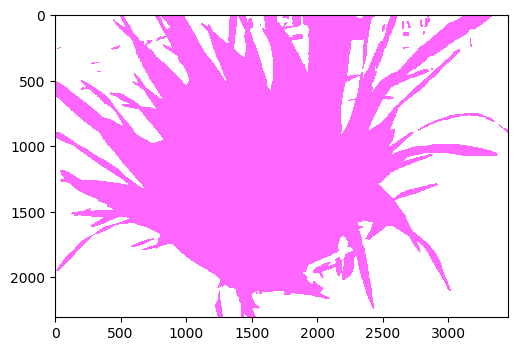

In [44]:
id_objects, obj_hierarchy = pcv.find_objects(masked2, ab_fill)

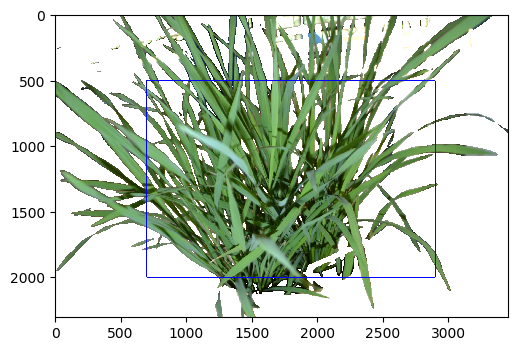

In [45]:
# Establish a rectangular region of interest

roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=700, y=500, h=1500, w=2200)

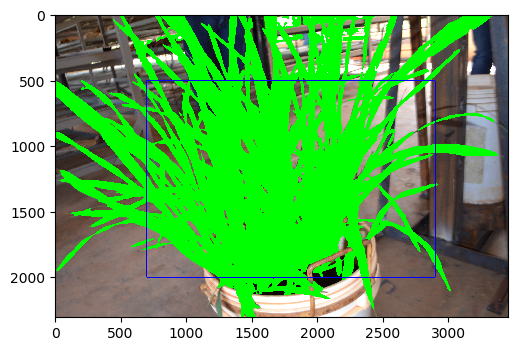

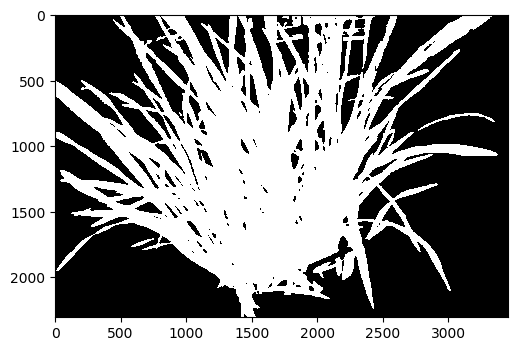

In [46]:
# Colour everything overlapping that region

roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1,
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')

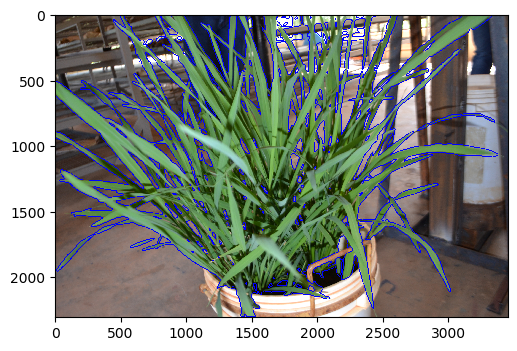

In [47]:
# Draw an outline on combined objects

obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

In [48]:
# Plot histogram

# color_histogram = pcv.analyze_color(rgb_img=img, mask=maskedb_thresh, hist_plot_type='all')

In [49]:
# Calculate the percentage of plant area in the image

bs = b_thresh

count = 0
white = 0
black = 0
for i in bs:
    for j in i:
        count += 1
        if j == 255:
            white += 1
        elif j == 0:
            black += 1
print("Percentage of plant in the image is: ",white/(bs.shape[0]*bs.shape[1]) * 100)

Percentage of plant in the image is:  44.05491204909337
